In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/'My Drive'/DeepLearning/AI_Australia_Assignment/img_info.csv .

In [ ]:
import pandas as pd
import pathlib
import shutil
import tempfile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics 

In [ ]:
train_df = pd.read_csv("./img_info.csv")

In [ ]:
# Creating the lips_distance/under_lip_thickness column
train_df['percent'] = train_df.apply(lambda row: (row.lips_distance / row.under_lip_thickness), axis=1) 

In [ ]:
# Drop the irrelevant columns: under_lip_thickness, lips_distance
train_df.drop(['under_lip_thickness', 'lips_distance'], axis=1, inplace=True)


In [ ]:
train_df.columns

Index(['img_name', 'smile', 'teeth', 'percent'], dtype='object')

# Explore the data
In order to detect the teeth, we look at the smile index ('smile') and the ratio between lips distance and under lip thickness ('percent').
We can't simply look at the distance between upper and under lips, as the sizes of pictures are different. 

In [ ]:
train_df.head()

,img_name,smile,teeth,percent
0,1.jpg,0.005,0,0.466667
1,2.jpg,0.002,0,0.125000
2,3.jpg,1.000,1,0.222222
3,4.jpg,1.000,1,0.468085
4,5.jpg,1.000,1,1.228571


In [ ]:
train_df['teeth'].value_counts()

1    147
0    135
Name: teeth, dtype: int64

## Exploring the correlation among attributes using heatmap

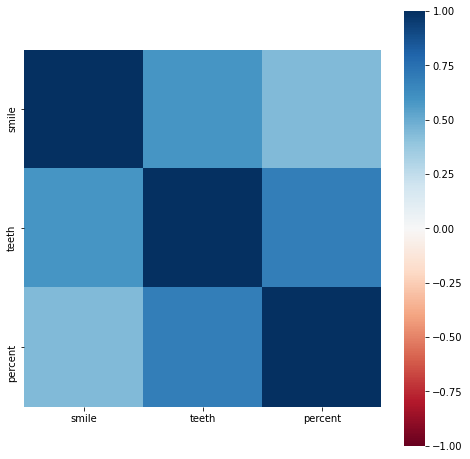

In [ ]:
correlations = train_df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(correlations, cmap="RdBu", center=0, vmin=-1, vmax=1, square=True)
plt.show()

### Observation
There's a higher correlation between 'teeth' and 'percent' than between 'teeth' and 'smile'. 

## Exploring the distribution among 'smile'

Text(0.5, 0, 'Smile')

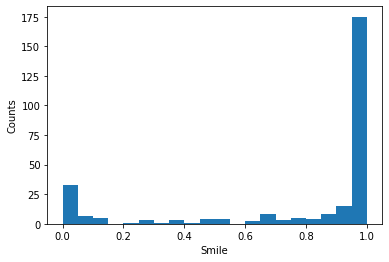

In [ ]:
%matplotlib inline
x = train_df['smile'].tolist()
# plt.hist(x, density=True, bins=20)  # density=False would make counts
plt.hist(x, density=False, bins=20)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Smile')

## Exploring the distribution among 'percent'

Text(0.5, 0, 'Percent')

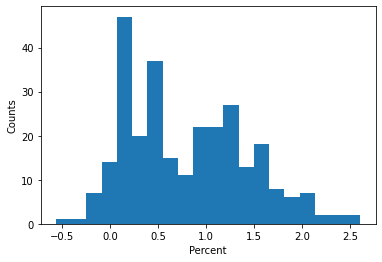

In [ ]:
x = train_df['percent'].tolist()
# plt.hist(x, density=True, bins=20)  # density=False would make counts
plt.hist(x, density=False, bins=20)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Percent')

'percent' and 'smile' are in a similar range, so I'll skip data normalisation. 

# Training setup

## Cross validation 
Given a limited amount of data set, with cross validation, we can miximize the number of data entries in both training set and validation set. It gives us a better representation of how well the model works than simply selecting a fixed portion out of the data set as validation set and the rest as trainning set.

In [ ]:
from sklearn import model_selection

In [ ]:
number_split = 6
kFold = model_selection.KFold(n_splits=number_split, shuffle=True, random_state = 3)

## Metric: accuracy score
This is a binary classification. False positive or false negative doesn't come at a higher cost than one another, so we pick accuracy score as our evaluation metric. 

 

In [ ]:
from sklearn.metrics import accuracy_score

## Splitting attributes and predictions as X,Y

In [ ]:
Train_X = train_df[['smile','percent']]
Train_Y = train_df['teeth']

# Start training 

## Algorithm choice: Logistic regression for this binary classification task. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Results_Val=[]  # For storing result from the validation set
Results_Train=[] # For storing result from the Training set

for trainIndex, valIndex in kFold.split(Train_X):
  # Get the training and validation data
  train_x = Train_X.loc[trainIndex]
  train_y = Train_Y.loc[trainIndex]
  valid_x = Train_X.loc[valIndex]
  valid_y = Train_Y.loc[valIndex]

  # Fit the model
  lr = LogisticRegression(random_state=1).fit(train_x, train_y)
  # For validation set
  val_pred_Y = lr.predict(valid_x)
  val_accuracy = accuracy_score(valid_y, val_pred_Y)
  Results_Val.append(val_accuracy)

  # For training set
  train_pred_Y = lr.predict(train_x)
  train_accuracy = accuracy_score(train_y, train_pred_Y)
  Results_Train.append(train_accuracy)

# Calculate the mean of results after this 10-fold cross validation for training set and validation set.
mean_train = statistics.mean(Results_Train)
print('Mean of train set accuracy: ', mean_train)
mean_val = statistics.mean(Results_Val)
print('Mean of validation set accuracy: ', mean_val)


Mean of train set accuracy:  0.8978723404255319
Mean of validation set accuracy:  0.8971631205673759


### Observation
The training set and the validation set have similar accuracy 

In [ ]:
# Saving the model
import pickle
filename = 'saved_model.sav'
pickle.dump(lr, open(filename, 'wb'))

# Saving the model to local disk
!cp -r ./saved_model.sav /content/drive/'My Drive'/DeepLearning/AI_Australia_Assignment/

In [ ]:
# some time later...
# Loading the model from local disk
!cp -r /content/drive/'My Drive'/DeepLearning/AI_Australia_Assignment/saved_model.sav .

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
def predict_teeth(my_model, smile, percent):
  # Given 'smile' and 'percent', predict whether teeth is detected.
  my_array = [[smile, percent]]
  result = my_model.predict(my_array)
  return result[0]

In [ ]:
predict_teeth(loaded_model, 1, 0.6)

1